In [1]:
import cvxpy as cp
import matplotlib.pyplot as plt
import numpy as np
import scipy 

In [2]:
from data import *

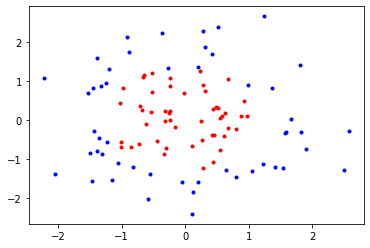

(2, 50)


In [3]:
X = np.random.multivariate_normal([0,0], [[1,0],[0,1]], 100)
# print(np.argpartition(X[:, 0]**2+X[:, 1]**2, 99))
X = X[np.argsort(X[:, 0]**2+X[:, 1]**2), :]
Y = X[50:, :].T
X = X[:50, :].T
Pos = X
Neg = Y

plt.plot(Pos[0,:], Pos[1,:], 'r.')
plt.plot(Neg[0,:], Neg[1,:], 'b.')
plt.show()

print(Pos.shape)

In [4]:
labels = np.concatenate([np.ones(50,), -1*np.ones(50,)])
print(labels.shape)

(100,)


In [8]:
points = np.concatenate([X, Y],axis = 1)
print(points.shape)
print(points)


(2, 100)
[[-0.15287674 -0.23825848  0.25264483 -0.25205146 -0.31979881 -0.23632102
  -0.32448441  0.43278288  0.54691719  0.42553807 -0.54227752  0.26393353
   0.5788369   0.45085067  0.48743408  0.51856743 -0.6150865   0.62290038
  -0.02213767  0.11030429  0.67132621 -0.44731068 -0.67604815  0.60806657
  -0.70548754 -0.30715095  0.31499841  0.80297571  0.87604278 -0.52472891
  -0.23960632 -0.34019242  0.54318602  0.28704119 -0.73320654  0.97412734
   0.93270782 -0.85900017 -0.23909051 -1.02749832 -1.01252738  0.43736007
  -1.00950761  0.67683483  0.28119886 -0.9732549  -0.67010889  0.22921541
  -0.51573705 -0.64296648  0.9853851  -1.22649719 -0.26753403  0.19726902
  -1.36339061  0.64794297 -0.82132549 -1.4388755  -0.54755198 -1.05627624
  -1.2471666  -1.30694917 -0.05541473  0.19400959  1.36321573 -1.33017366
  -1.38387377  1.57902057  1.59533007  1.65924579 -1.44675031  0.79843672
   1.23152391 -1.53169392  1.06014689 -1.50605374  0.41495693 -1.195072
   1.82293917  0.12851151  1.42

In [22]:
def gaussian_kernel(M):
    pass

# points_in_6d = np.apply_along_axis(polynomial_kernel, 0, points)
# print(points_in_6d.shape)
# print(points_in_6d[:,0])
# #for checking
# print(2**0.5*points[0,0])
# # d = yiyje^(xi - xj)
from scipy.spatial import distance_matrix
print(distance_matrix(points.T,points.T).shape)
norm_matrix = (distance_matrix(points.T,points.T))**2
print(np.diag(norm_matrix))

(100, 100)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [23]:

# dataset = np.vstack([points_in_6d, labels])
# print(dataset.shape)
# print(dataset[:,51])

In [24]:
# YiXi = np.multiply(points_in_6d,labels.T)
# print(YiXi.shape)
# print(YiXi[:,51])

In [59]:
# D = YiXi.T @YiXi + np.eye(YiXi.shape[1])*1e-5
#print(labels.shape)
YiYj = labels[:, np.newaxis] @ labels[:, np.newaxis].T
#print(YiYj)
D = np.multiply(YiYj, np.exp(-1*norm_matrix/2))
print(np.argmax(D))
print(np.all(np.linalg.eigvals(D) >= 0))
print(np.linalg.eigvals(D))


0
True
[3.48263484e+01 1.55612478e+01 1.46939454e+01 7.16889283e+00
 6.26943026e+00 5.46812391e+00 2.95555550e+00 2.55092547e+00
 2.09241462e+00 1.82357393e+00 1.16093609e+00 9.31700835e-01
 8.90017076e-01 7.62973489e-01 5.97286909e-01 4.51461084e-01
 3.87420221e-01 2.95855678e-01 2.35266005e-01 2.00488491e-01
 1.53673217e-01 1.05702898e-01 9.69885600e-02 6.77978083e-02
 5.89825869e-02 4.85756835e-02 3.38526665e-02 2.77683741e-02
 1.88784572e-02 1.21585421e-02 1.03806842e-02 9.19711741e-03
 7.61581885e-03 6.58044536e-03 5.70770178e-03 3.51914965e-03
 1.82427935e-03 1.47233473e-03 1.22795155e-03 1.05532527e-03
 7.18488653e-04 5.88570738e-04 4.72381180e-04 4.30137800e-04
 1.91097912e-04 1.54181730e-04 1.50027315e-04 1.22062195e-04
 7.87790121e-05 6.90869489e-05 6.33523623e-05 3.59868831e-05
 3.14319555e-05 1.66081968e-05 1.39413924e-05 1.18075167e-05
 7.16824589e-06 5.13316176e-06 4.69891411e-06 2.74006703e-06
 2.12139973e-06 1.97369470e-06 1.48171848e-06 1.14347365e-06
 6.54950439e-07 4

In [67]:
k = 2
C = 0.1
print(cp.settings.EIGVAL_TOL)
cp.settings.EIGVAL_TOL = 1e-08
#cp.solvers.options['abstol'] = 1e-10
from cvxpy.atoms.affine.wraps import psd_wrap

lambd = cp.Variable(shape=(100,))
gamma = cp.Variable(shape=(100,))
objective = cp.Minimize(-cp.sum(lambd) + 0.5*cp.quad_form(lambd, psd_wrap(D)))

constraints= [lambd >= 0, lambd.T @ labels == 0 ,lambd <= C*np.ones(100,), lambd+gamma==C*np.ones(100)]
problem = cp.Problem(objective, constraints)
problem.solve(solver = cp.ECOS)

1e-08


-6.278199212778139

In [68]:
print(lambd.value.T @labels)
print(lambd.value[np.where(lambd.value <=0)])

-7.674416657721395e-15
[]


In [79]:
lamb2 = np.round(lambd.value,3)
k = np.where((lamb2 < C) & (lamb2 > 0))
print(k)
print(np.round(lambd.value,3))

(array([ 6, 87, 94, 95, 99]),)
[0.    0.    0.    0.    0.1   0.    0.022 0.    0.1   0.1   0.1   0.1
 0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1
 0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1
 0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1
 0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1
 0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1
 0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1
 0.1   0.1   0.1   0.049 0.    0.1   0.1   0.1   0.1   0.    0.022 0.06
 0.    0.    0.    0.091]


In [80]:
from sklearn.kernel_approximation import RBFSampler

b = 0
rbf_feature = RBFSampler(gamma = 0.5 , random_state = 1)
print(labels.shape)
print(points.shape)
points_in_infd = rbf_feature.fit_transform(points.T).T
print(points_in_infd.shape)
YiXi = np.multiply(points_in_infd,labels.T)
j = np.multiply(YiXi, lambd.value.T)
print(j.shape)
w = np.sum(j,axis = 1)
print(w.shape)
print(w)

(100,)
(2, 100)
(100, 100)
(100, 100)
(100,)
[ 0.32903672 -0.25959917 -0.07214106 -0.33121163 -0.28735332 -0.27409238
 -0.39405763 -0.06500396 -0.04464923 -0.01715521  0.40180132 -0.24847929
  0.04406391 -0.1878813  -0.20505789  0.03035001  0.00508614  0.24187235
 -0.09484155 -0.03883947  0.02735779  0.25680712 -0.34799598  0.23731434
 -0.39746069  0.02797547 -0.42193024  0.01522331 -0.3555588  -0.26095226
 -0.06336292  0.1512523  -0.18832436  0.25057232  0.31104485  0.07966285
  0.11085708  0.19440097 -0.10775027 -0.13255637  0.01660174 -0.19932897
 -0.2170519   0.00871502 -0.0753124  -0.03853041  0.01308091  0.3897892
 -0.0060516   0.1395302   0.02465241 -0.25313867 -0.05311888 -0.02843451
 -0.00634463  0.07253411 -0.18188836 -0.15787446 -0.00189208  0.37162077
 -0.21298    -0.43560855  0.04271568 -0.04671854 -0.12597597 -0.00999731
  0.17467521  0.05755827 -0.01191208 -0.27617139  0.03449316  0.30677151
 -0.16516266  0.172148    0.02187232 -0.44987489  0.36644757  0.21116485
  0.104

In [93]:
for i in k:
     print(labels[i] - w.T @ points_in_infd[:,i])
b = labels[k[0][0]] - w.T @ points_in_infd[:,k[0][0]]
print(b)

[-0.61676785 -0.68075788 -0.66619125 -0.99119024 -0.85873494]
-0.6167678458786443


In [88]:
print(np.where(w.T @ points_in_infd + b >=0))
print(len(np.where(w.T @ points_in_infd + b >=0)[0]))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 43, 47, 50]),)
44


In [89]:
print(np.where(w.T @ points_in_infd + b <=0))
print(len(np.where(w.T @ points_in_infd + b <=0)[0]))

(array([41, 42, 44, 45, 46, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94,
       95, 96, 97, 98, 99]),)
56


In [90]:
h = 0.02
x_min, x_max = points[0, :].min() - 1, points[0, :].max() + 1
y_min, y_max = points[1, :].min() - 1, points[1, :].max() + 1
print(x_min, x_max)
print(y_min,y_max)
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
print(xx.shape)

-3.2212575036992632 3.5730260083918064
-3.405434719073713 3.654481663898312
(353, 340)


In [96]:
def gaussian_hyperplane(x,y,w,b):
    x_feat = rbf_feature.transform([[x,y], [x, y]])[0, :]
    return (w.T @ x_feat + b)


In [97]:
Z = np.ones((xx.shape))
for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        Z[i][j] = gaussian_hyperplane(xx[i][j],yy[i][j],w,b)

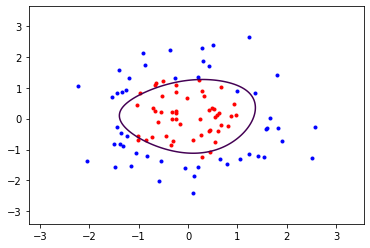

In [98]:
plt.plot(Pos[0,:], Pos[1,:], 'r.')
plt.plot(Neg[0,:], Neg[1,:], 'b.')
plt.contour(xx, yy, Z,[0])
plt.show()